# Drift Detection
We will use KS drift

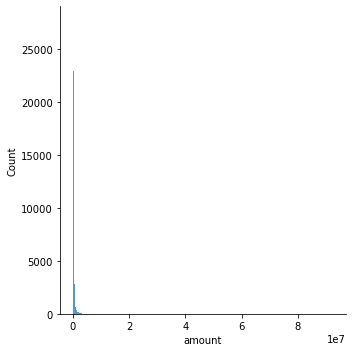

In [8]:
sns.displot(X['amount'])

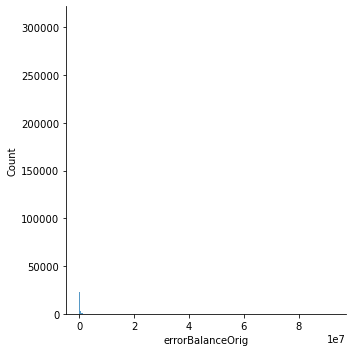

In [26]:
sns.displot(X['errorBalanceOrig'])

In [28]:
!pip install alibi-detect

     |████████████████████████████████| 160 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 11.8 MB/s eta 0:00:01     |██████████████▌                 | 972 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 941 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 50.4 MB 14.0 MB/s eta 0:00:01
  Using cached tensorflow_probability-0.12.1-py2.py3-none-any.whl (4.8 MB)
     |████████████████████████████████| 662 kB 11.9 MB/s eta 0:00:01
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Using cached toolz-0.11.1-py3-none-any.whl (55 kB)
     |████████████████████████████████| 107 kB 27.1 MB/s eta 0:00:01


     |████████████████████████████████| 91 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 862 kB 29.5 MB/s eta 0:00:01
     |████████████████████████████████| 733 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 28.5 MB/s eta 0:00:01
  Using cached filelock-3.0.12-py3-none-any.whl (7.6 kB)
  Created wheel for sacremoses: filename=sacremoses-0.0.44-py3-none-any.whl size=886084 sha256=6b0f36e99aa82f722a3f95995d00c0dd91621b7f4180f9f93b61391f0fd94860
  Stored in directory: /home/tom/.cache/pip/wheels/d6/17/75/f2ed13c472c4cecc14f003401bb45efadca64cc589d4bf3103
Successfully built sacremoses


In [44]:
from alibi_detect.cd import KSDrift
from alibi_detect.utils.saving import save_detector, load_detector

trainX_array = trainX.to_numpy()
testX_array = testX.to_numpy()
trainY_array = trainY.to_numpy()
testY_array = testY.to_numpy()

def random_sample(X: np.ndarray, y: np.ndarray, proba_zero: float, n: int):
    if len(y.shape) == 1:
        idx_0 = np.where(y == 0)[0]
        idx_1 = np.where(y == 1)[0]
    else:
        idx_0 = np.where(y[:, 0] == 1)[0]
        idx_1 = np.where(y[:, 1] == 1)[0]
    n_0, n_1 = int(n * proba_zero), int(n * (1 - proba_zero))
    idx_0_out = np.random.choice(idx_0, n_0, replace=False)
    idx_1_out = np.random.choice(idx_1, n_1, replace=False)
    X_out = np.concatenate([X[idx_0_out], X[idx_1_out]])
    y_out = np.concatenate([y[idx_0_out], y[idx_1_out]])
    return X_out, y_out

cd = KSDrift(
    p_val=.10,
    X_ref=trainX_array,            # reference data to test against
    preprocess_X_ref=False
)

In [52]:
X_sample = random_sample(testX_array, testY_array, proba_zero=.5, n=1000)[0]

In [53]:
X_sample

array([[ 1.89000000e+02,  1.00000000e+00,  3.12559600e+04, ...,
         2.26035320e+05,  3.12559600e+04, -2.91038305e-11],
       [ 2.37000000e+02,  0.00000000e+00,  3.51681570e+05, ...,
         5.32399860e+05,  3.31371570e+05,  0.00000000e+00],
       [ 4.03000000e+02,  1.00000000e+00,  2.96815000e+04, ...,
         3.52848690e+05,  2.96815000e+04,  0.00000000e+00],
       ...,
       [ 1.74000000e+02,  1.00000000e+00,  1.88872200e+04, ...,
         1.88872200e+04,  0.00000000e+00,  0.00000000e+00],
       [ 3.61000000e+02,  1.00000000e+00,  1.74201206e+06, ...,
         1.81289367e+06,  0.00000000e+00,  2.32830644e-10],
       [ 4.00000000e+01,  1.00000000e+00,  6.18877244e+06, ...,
         1.24428366e+07,  0.00000000e+00, -1.97267430e+05]])

In [54]:
preds_h0 = cd.predict(X_sample, return_p_val=True)
labels = ['No!', 'Yes!']
print('Drift? {}'.format(labels[preds_h0['data']['is_drift']]))
print('p-value: {}'.format(preds_h0['data']['p_val']))

Drift? Yes!
p-value: [2.7123981e-35 7.5072457e-22 2.9568718e-27 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'oldBalanceOrig'}>,
        <AxesSubplot:title={'center':'newBalanceOrig'}>,
        <AxesSubplot:title={'center':'oldBalanceDest'}>],
       [<AxesSubplot:title={'center':'newBalanceDest'}>,
        <AxesSubplot:title={'center':'errorBalanceOrig'}>,
        <AxesSubplot:title={'center':'errorBalanceDest'}>]], dtype=object)

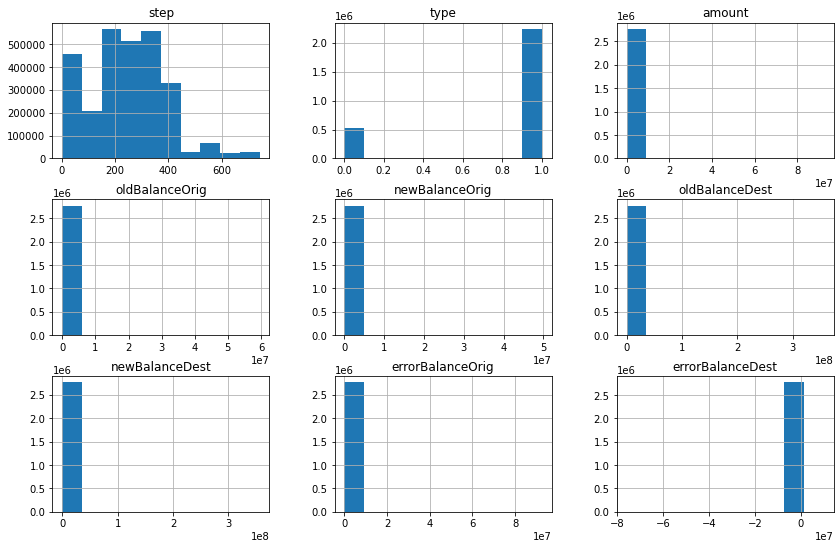

In [49]:
X.hist(figsize=(14, 9))